In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 250

# Trovare $\alpha$

In [83]:
Dd = "0.95"
function = "flatx"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [84]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [85]:
#funzione Dd
data1 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s1 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data1[0]))

In [86]:
alpha1, alpha3 = s1.threshold(pop=subnets, N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 250	noverlap=125


In [87]:
Dd = "0.85"
function = "flatx"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [88]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [89]:
#funzione Dd
data2 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s2 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data2[0]))

In [90]:
alpha2, alpha4 = s2.threshold(pop=subnets, N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 250	noverlap=125


In [91]:
#s.info()

#s2.histogram('all', res = 10., dd_par= sigm_par, save_img = periodogram_path + "/activity" + new_function + ".png")

In [92]:
#dopamine depletion periodogram
#s2.periodogramdd(pop=subnets, data=data1, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

In [93]:
#s2.threshold_imgs(pop=subnets, N_parseg=parseg), save_img = *)

In [94]:
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2182492996294618
0.05172471341181878
0.3493352511079133
0.026688071061196875


In [95]:
alpha = (alpha1 + alpha2)/2
print(alpha)

0.6349870065206403


In [96]:
alpha_mean = (alpha3 + alpha4)/2
print(alpha_mean)

0.18801166108455508


# FLAT 0.85

nparseg = 250	noverlap=125
frequenza del massimo: 17.0
valore del massimo: 16.965581684624393


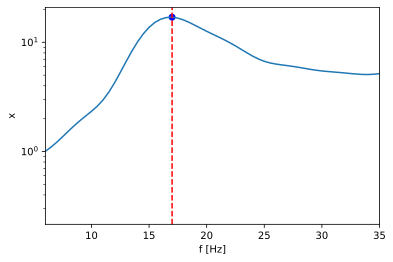

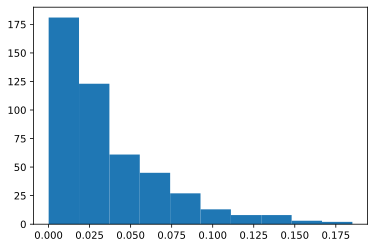

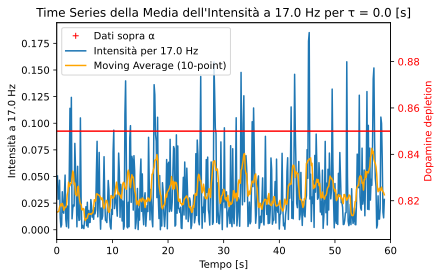

In [97]:
data = data2
output=s2.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

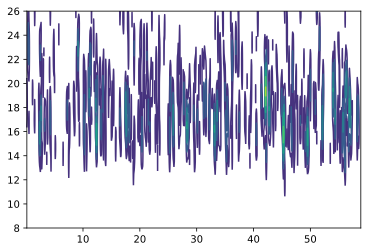

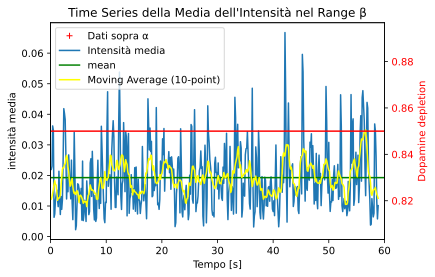

In [98]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [99]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

In [100]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

# FLAT 0.95

nparseg = 250	noverlap=125
frequenza del massimo: 17.0
valore del massimo: 459.66659053162715


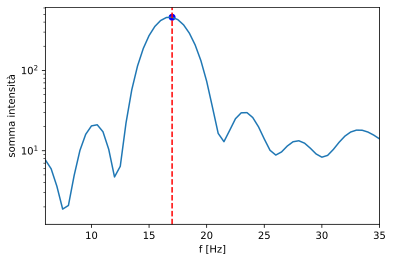

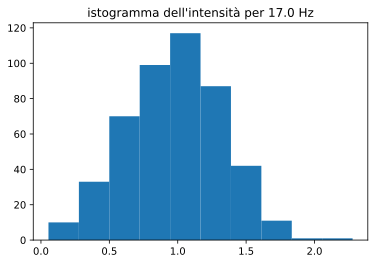

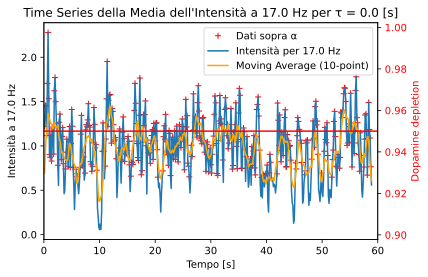

In [21]:
data = data1
output=s1.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

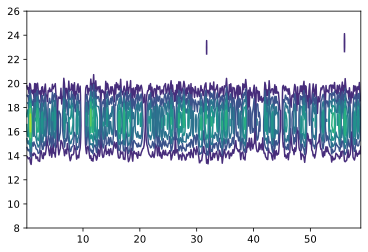

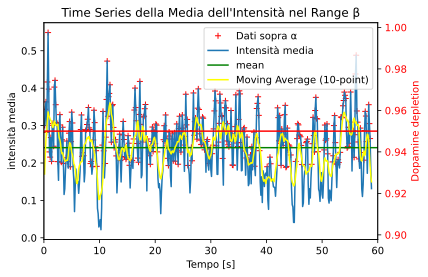

In [22]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [23]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [76, 77, 157, 21, 18, 24, 58], 61.57142857142857)

In [24]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(9, [41, 24, 76, 139, 20, 8, 10, 6, 57], 42.333333333333336)

# FLAT1

In [25]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [26]:
Dd = "0.95"
function = "flat1"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [27]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [28]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 250	noverlap=125
frequenza del massimo: 16.5
valore del massimo: 622.741503123976


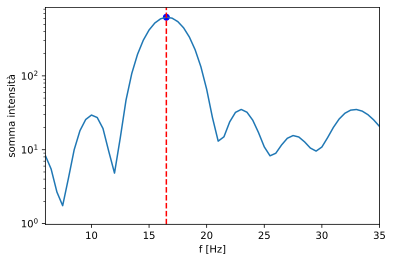

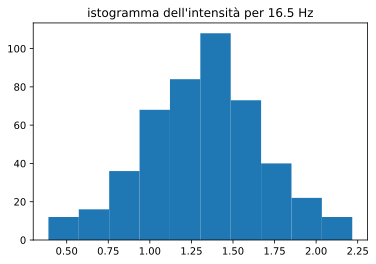

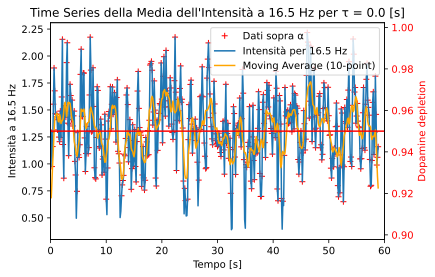

In [29]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

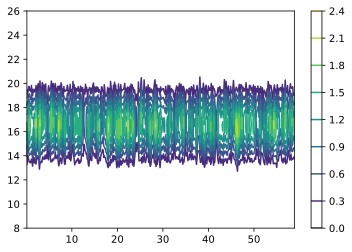

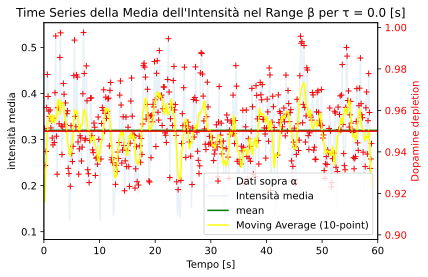

In [30]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.colorbar()
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t,alpha=0.1, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [31]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [471], 471.0)

In [32]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [471], 471.0)

# FLAT2

In [33]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [66]:
Dd = "0.95"
function = "flat2"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [67]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [68]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 250	noverlap=125
frequenza del massimo: 16.5
valore del massimo: 448.602628894872


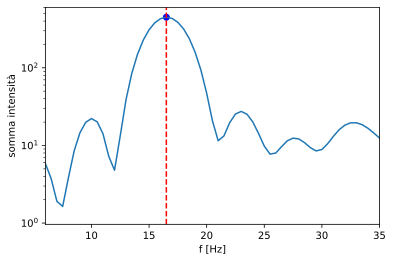

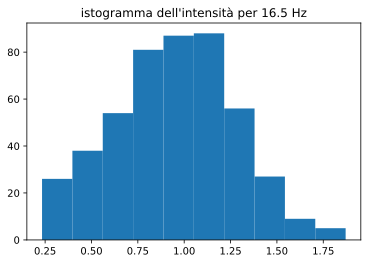

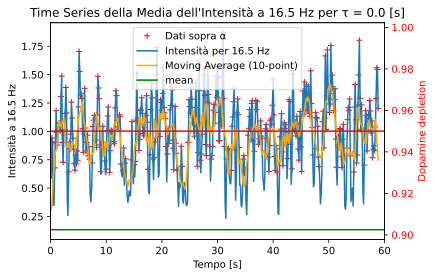

In [69]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

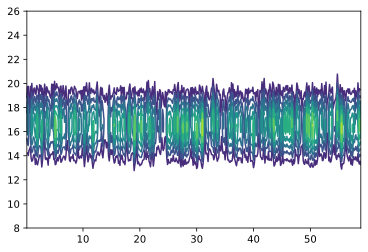

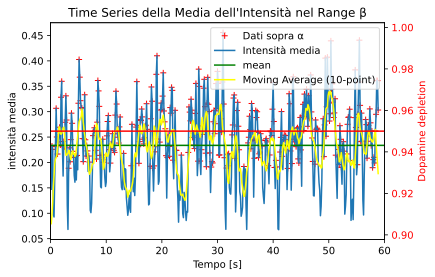

In [76]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')
ax1.axhline(y=np.mean(pow_t), label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [71]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(4, [103, 61, 74, 188], 106.5)

In [72]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(6, [99, 59, 74, 101, 41, 31], 67.5)

# SIGMOID10

In [41]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [42]:
Dd = "0.95"
function = "sigmoid10"
subnets = "STN"
sigm_par = 0.00006

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [43]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [44]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 250	noverlap=125
frequenza del massimo: 16.5
valore del massimo: 920.6806556684189


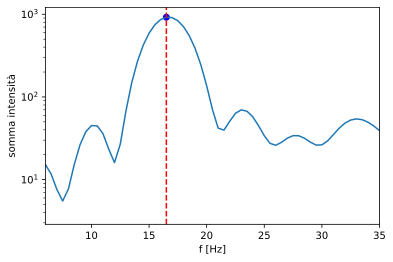

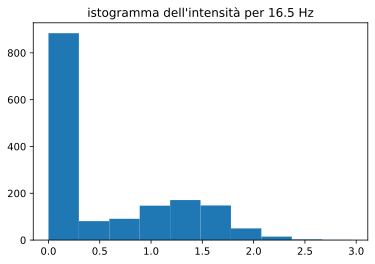

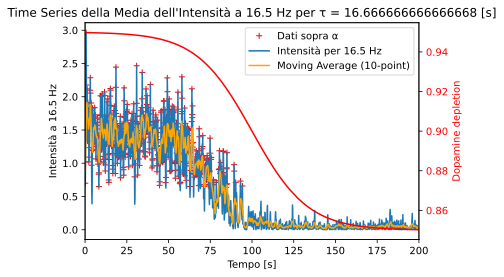

In [45]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

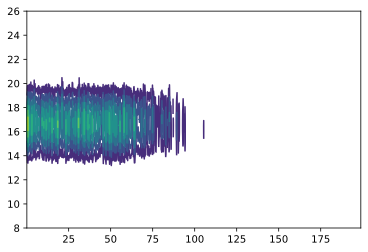

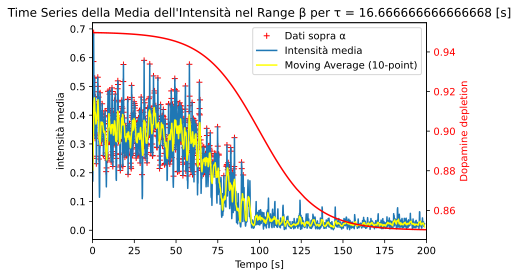

In [46]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [47]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(3, [607, 15, 6], 209.33333333333334)

In [48]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(3, [566, 19, 9], 198.0)

# SIGMOID11

In [8]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
alpha = 0.2573329144325134
alpha_mean = 0.16799556857190273

In [9]:
Dd = "0.95"
function = "sigmoid11"
subnets = "STN"
sigm_par = 0.00004

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [10]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [11]:
#dopamine depletion periodogram
#s5.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 250	noverlap=125
frequenza del massimo: 17.0
valore del massimo: 755.3278289872977


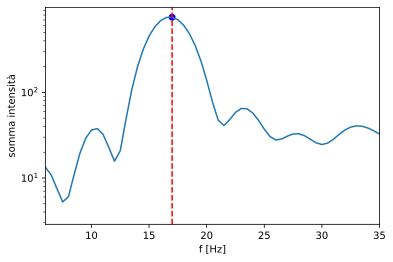

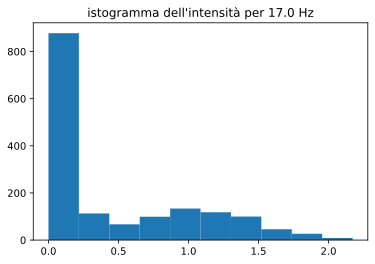

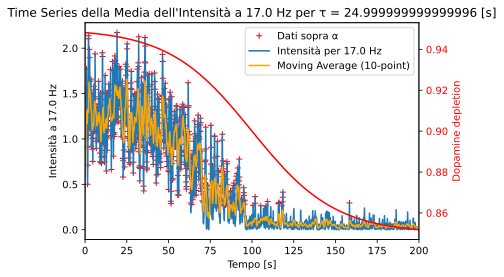

In [12]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

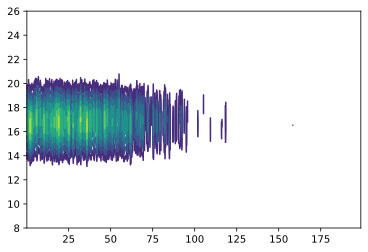

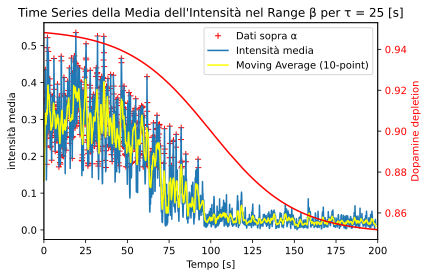

In [13]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = 25 [s]')
plt.show()

In [14]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(6, [565, 9, 42, 36, 5, 17], 112.33333333333333)

In [15]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(2, [504, 42], 273.0)

# SIGMOID12

In [57]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [58]:
Dd = "0.95"
function = "sigmoid12"
subnets = "STN"
sigm_par = 0.001

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [59]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [60]:
#dopamine depletion periodogram
#s5.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 250	noverlap=125
frequenza del massimo: 16.5
valore del massimo: 823.5438658517687


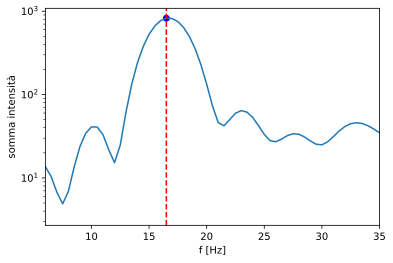

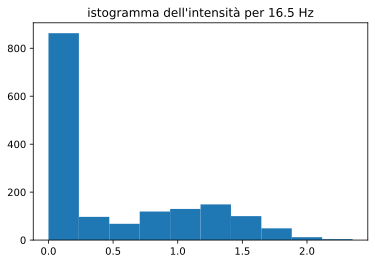

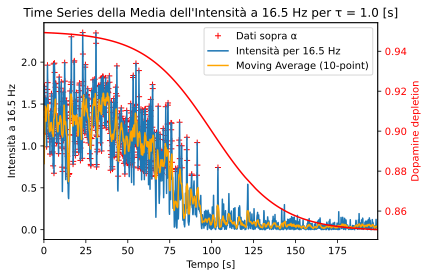

In [61]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1] - 1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

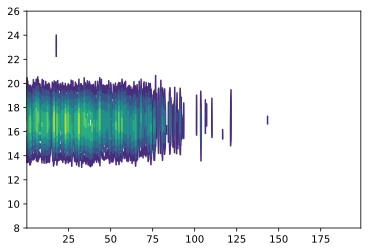

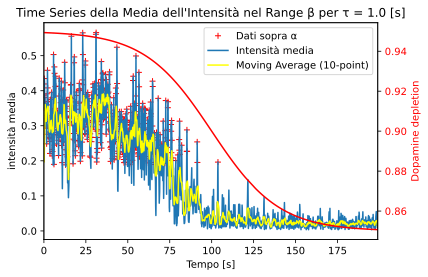

In [62]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1] - 1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [63]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(3, [547, 44, 6], 199.0)

In [64]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(5, [112, 409, 6, 41, 9], 115.4)

# FLAT. media a 8

In [65]:
all_Sxx_max_index = []
all_pow_t = []
t = []
f = []
for ss in s:
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    # faccio somma nel tempo per trovare frequenza max #######################################################
    sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

    # Ottieni l'indice del massimo della funzione
    max_index = np.argmax(sum1)
    max_value = sum1[max_index]
    print('frequenza del massimo:', f[max_index])
    print('valore del massimo:', max_value)

    # 2Estrarre la colonna corrispondente all'indice max_index #########################################################
    Sxx_max_index = Sxx[max_index, :]

    all_Sxx_max_index.append(output[2][max_index])

    ################################################################################################
    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]


    pow_t = []
    for i in range(len(t)):
        pow_t.append( np.mean(Sxx_lim[:, i]) )


    all_pow_t.append(pow_t)

    # Creare un grafico dei valori nel tempo
    # Finestra mobile (rolling window) per il calcolo della moving average
    window_size = 10  # Sostituisci con la dimensione della finestra desiderata
    moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

    pow_t = np.array(pow_t)

###################################################################################################################
Sxx_max_index_mean = np.mean(np.vstack(all_Sxx_max_index), axis=0)
pow_t_mean = np.mean(np.vstack(all_pow_t), axis=0)
Sxx_error = np.std(np.vstack(all_Sxx_max_index), axis=0)
pow_error = np.std(np.vstack(all_pow_t), axis=0)

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, Sxx_max_index_mean, yerr=Sxx_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

ax1.plot(t, Sxx_max_index_mean, label=f'Intensità per {f[max_index]:.1f} Hz', color='lightblue')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index_mean, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0][10000:]-data[0][10000], data[1][10000:], 'r-')
ax2.set_ylim(0.82,0.96)
ax2.set_xlim(0, data[0][-1]-1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

# Creare un grafico dei valori nel tempo########################################################
fig, ax1 = plt.subplots()

# Plot dei dati originali
# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

ax1.plot(t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0][10000:]-data[0][10000], data[1][10000:], 'r-')
ax2.set_xlim(0, data[0][-1]-1)
ax2.set_ylim(0.82,0.96)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

Sxx_max_index_mean_point = np.mean(Sxx_max_index_mean)
pow_t_mean_point = np.mean(pow_t_mean)
Sxx_error_point = np.std(Sxx_error)
pow_error_point = np.std(pow_error)

TypeError: 'SpikeSim' object is not iterable

In [ ]:
function = "flat"
Dd = lista_Dd
subnets = "STN"
simulations = [str(i) for i in range(8)]
sigm_par = float('inf')

Sxx_max_index_mean_point = []
pow_t_mean_point = []
Sxx_error_point = []
pow_error_point = []

for ddd in Dd:
    #funzione Dd
    print(ddd)
    data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T
    data[0] = data[0]/1000
    data[1] = data[1]/1.083

    periodogram_paths = []
    s = []
    for simulation in simulations:
        periodogram_path = './periodograms/' + ddd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
        if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
            os.makedirs(periodogram_path) 
        periodogram_paths.append(periodogram_path)
        ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
        s.append(ss)

    all_Sxx_max_index = []
    all_pow_t = []
    t = []
    f = []
    for ss in s:
        output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")

        f = output[0]
        t = output[1]
        Sxx = output[2]

        # faccio somma nel tempo per trovare frequenza max #######################################################
        sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

        # Ottieni l'indice del massimo della funzione
        max_index = np.argmax(sum1)
        print('frequenza del massimo:', f[max_index])

        # 2Estrarre la colonna corrispondente all'indice max_index #########################################################
        Sxx_max_index = Sxx[max_index, :]

        all_Sxx_max_index.append(output[2][max_index])

        ################################################################################################
        mask = (8 <= f) & (f <= 26)
        Sxx_lim = Sxx[mask,:]
        f_lim = f[mask]


        pow_t = []
        for i in range(len(t)):
            pow_t.append( np.mean(Sxx_lim[:, i]) )


        all_pow_t.append(pow_t)

        # Creare un grafico dei valori nel tempo
        # Finestra mobile (rolling window) per il calcolo della moving average
        window_size = 10  # Sostituisci con la dimensione della finestra desiderata
        moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

        pow_t = np.array(pow_t)

    ###################################################################################################################
    Sxx_max_index_mean = np.mean(all_Sxx_max_index)
    pow_t_mean = np.mean(all_pow_t)

    Sxx_error = np.std(np.vstack(all_Sxx_max_index), axis=0)/np.sqrt(len(simulations))
    Sxx_error = np.mean(Sxx_error)
    pow_error = np.std(np.vstack(all_pow_t), axis=0)/np.sqrt(len(simulations))
    pow_error = np.mean(pow_error)

    Sxx_max_index_mean_point.append(Sxx_max_index_mean)
    pow_t_mean_point.append(pow_t_mean)
    Sxx_error_point.append(Sxx_error)
    pow_error_point.append(pow_error)

print(Sxx_max_index_mean_point)
print(pow_t_mean_point)
print(Sxx_error_point)
print(pow_error_point)